# rapid scs


# make flow through figures 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from matplotlib.dates import date2num
import numpy as np
import cartopy
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cmocean.cm as cmo
import os
from collections import OrderedDict
import matplotlib as mpl
mpl.rcParams['font.size'] = 14
from scipy.optimize import curve_fit
import shapely

/anaconda3/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [3]:
land_10m = cartopy.feature.NaturalEarthFeature('physical', 'land', '10m',
                                        edgecolor='face',
                                        facecolor=cartopy.feature.COLORS['land'])
pc = cartopy.crs.PlateCarree()
merc = cartopy.crs.Mercator(central_longitude=-85.0)

# read in data

In [4]:
df = pd.read_csv('../../data/HRRO3 March 25-27 2018/SCS_ Pelican/MIDAS/MIDAS_001.elg', parse_dates=[[0,1]], index_col=0, na_values='na', nrows=95000)

In [5]:
#convert from shoved together numbers to decimal degrees by pulling apart number as a string
df.loc[:,'ADU800-GGA-Lat'] = [float(str(la)[:2]) + float(str(la)[2:-1])/60 for la in df['ADU800-GGA-Lat']]
#and again for longitude
df.loc[:,'ADU800-GGA-Lon'] = [-(float(str(lo)[1:3]) + float(str(lo)[3:-1])/60) for lo in df['ADU800-GGA-Lon']]

# plot data

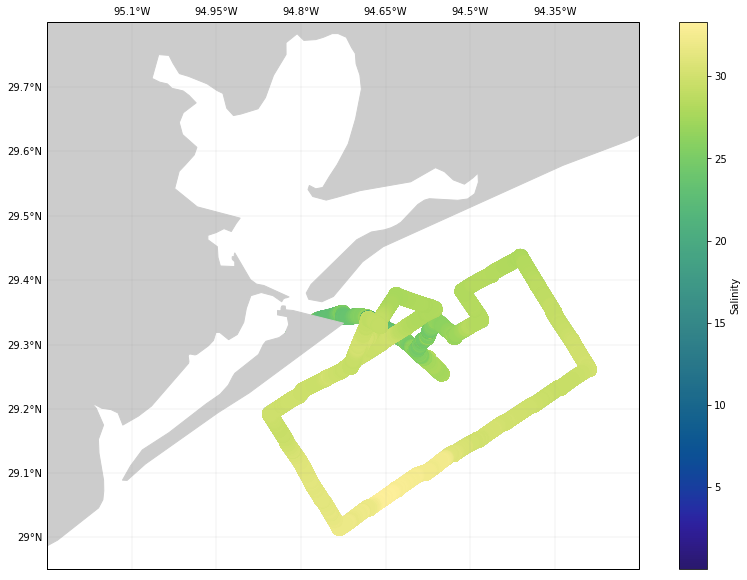

In [51]:
# Figure with Galveston Bay
fig = plt.figure(figsize=(12, 8)) # (9.4, 7.7))

ax = fig.add_axes([0.06, 0.01, 0.93, 0.95], projection=merc)
ax.set_frame_on(False) # kind of like it without the box
#extent controls bounds of cruise
ax.set_extent([-95.25, -94.2, 28.95, 29.8], pc)
gl = ax.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=True)
# the following two make the labels look like lat/lon format
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_bottom = False  # turn off labels where you don't want them
gl.ylabels_right = False
ax.add_feature(land_10m, facecolor='0.8')
ax.set_facecolor('0.8')

mappable = ax.scatter(df['ADU800-GGA-Lon'], df['ADU800-GGA-Lat'], c=df['Thermosalinograph-Data-Salinity'], s=200, cmap=cmo.haline, transform=pc)
cb = fig.colorbar(mappable)
cb.set_label('Salinity')

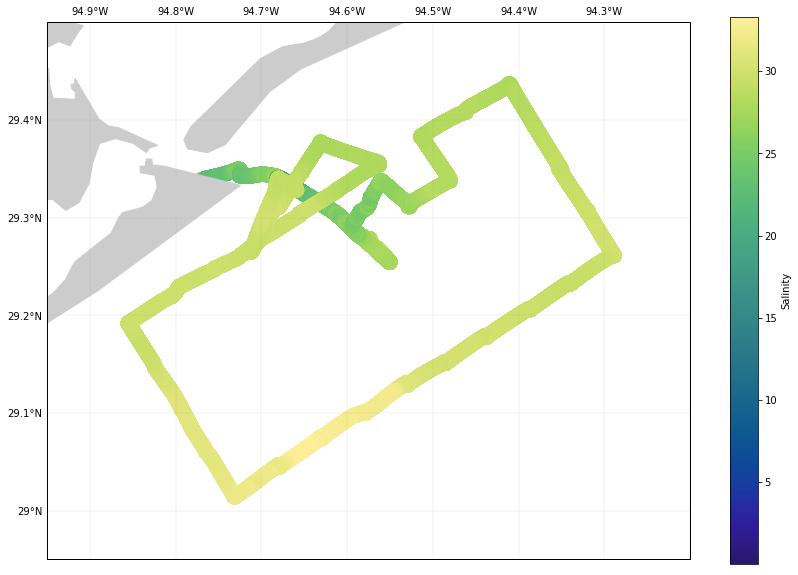

In [52]:
# Figure without Galveston Bay
fig = plt.figure(figsize=(12, 8)) # (9.4, 7.7))

ax = fig.add_axes([0.06, 0.01, 0.93, 0.95], projection=merc)
ax.set_frame_on(False) # kind of like it without the box
#extent controls bounds of cruise
ax.set_extent([-94.95, -94.2, 28.95, 29.5], pc)
gl = ax.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=True)
# the following two make the labels look like lat/lon format
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_bottom = False  # turn off labels where you don't want them
gl.ylabels_right = False
ax.add_feature(land_10m, facecolor='0.8')
ax.set_facecolor('0.8')

mappable = ax.scatter(df['ADU800-GGA-Lon'], df['ADU800-GGA-Lat'], c=df['Thermosalinograph-Data-Salinity'], s=200, cmap=cmo.haline, transform=pc)
cb = fig.colorbar(mappable)
cb.set_label('Salinity')

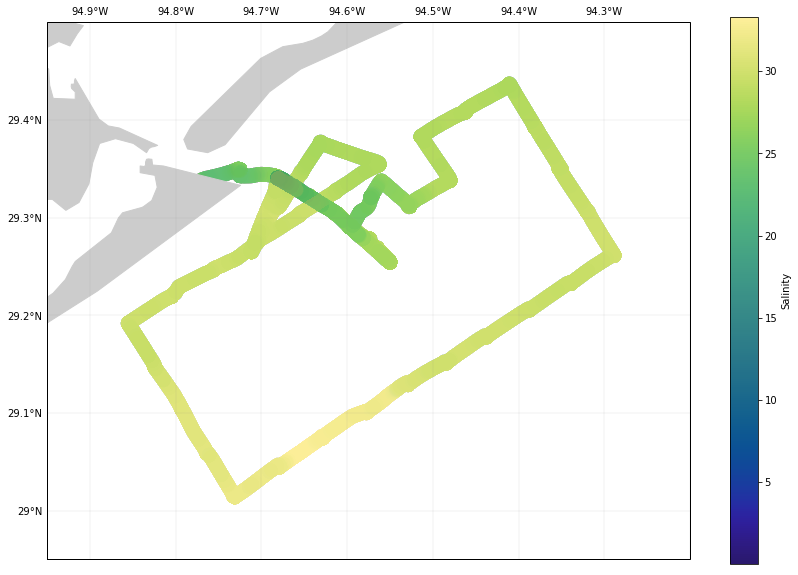

In [83]:
# Figure without Galveston Bay and added transparency
fig = plt.figure(figsize=(12, 8))# (9.4, 7.7)

ax = fig.add_axes([0.06, 0.01, 0.93, 0.95], projection=merc)
ax.set_frame_on(False) # kind of like it without the box
#extent controls bounds of cruise
ax.set_extent([-94.95, -94.2, 28.95, 29.5], pc)
gl = ax.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=True)
# the following two make the labels look like lat/lon format
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_bottom = False  # turn off labels where you don't want them
gl.ylabels_right = False
ax.add_feature(land_10m, facecolor='0.8')
ax.set_facecolor('0.8')

mappable = ax.scatter(df['ADU800-GGA-Lon'], df['ADU800-GGA-Lat'], c=df['Thermosalinograph-Data-Salinity'], s=200, cmap=cmo.haline, transform=pc, alpha=0.01)
cb = fig.colorbar(mappable)
cb.set_alpha(1)
cb.draw_all()
cb.set_label('Salinity')

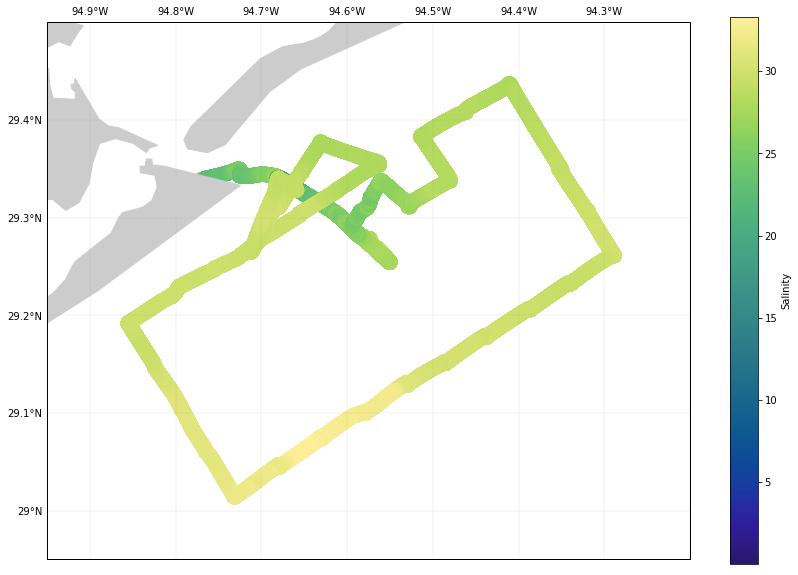

In [85]:
# Figure without Galveston Bay
fig = plt.figure(figsize=(12, 8)) # (9.4, 7.7))

ax = fig.add_axes([0.06, 0.01, 0.93, 0.95], projection=merc)
ax.set_frame_on(False) # kind of like it without the box
#extent controls bounds of cruise
ax.set_extent([-94.95, -94.2, 28.95, 29.5], pc)
gl = ax.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=True)
# the following two make the labels look like lat/lon format
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_bottom = False  # turn off labels where you don't want them
gl.ylabels_right = False
ax.add_feature(land_10m, facecolor='0.8')
ax.set_facecolor('0.8')

mappable = ax.scatter(df['ADU800-GGA-Lon'], df['ADU800-GGA-Lat'], c=df['Thermosalinograph-Data-Salinity'], s=200, cmap=cmo.haline, transform=pc)
cb = fig.colorbar(mappable)
cb.set_label('Salinity')

In [86]:
df.columns

Index(['ADU800-GGA-Lat', 'ADU800-GGA-Lon', 'Sperry-MK1-Gyro-Hdg-deg',
       'Furuno-SC50-GPS-Hdg-Hdg', 'Knudsen-True-Depth-DRV-VALUE',
       'Thermosalinograph-Data-Temp', 'Thermosalinograph-Data-Salinity',
       'Thermosalinograph-Data-Conductivity',
       'Thermosalinograph-Data-Sound-Velocity',
       'Transmissometer-percent-DRV-VALUE',
       'Wetstar-Flourometer-microgperL-DRV-VALUE', 'SPAR-Voltage-DRV-VALUE',
       'SPAR-Microeinsteins-DRV-VALUE', 'Air-Temp-1-VALUE',
       'Rel-Humidity-1-VALUE', 'BaromPress-1-VALUE', 'Rel-Winddir-1-VALUE',
       'Rel-Windspd-1-VALUE', 'True-Wind-1-DRV-DIRECTION',
       'True-Wind-1-DRV-SPEED', 'Air-Temp-2', 'Rel-Humidity-2', 'BaromPress-2',
       'Rel-WindDir-2', 'Rel-WindSpd-2', 'True-Wind-2-DRV-DIRECTION',
       'True-Wind-2-DRV-SPEED', 'Unnamed: 29'],
      dtype='object')

In [152]:
df['ADU800-GGA-Lon']['2018-3-25 04:50':'2018-3-25 06:00']

Date_Time
2018-03-25 04:50:00   -94.815759
2018-03-25 04:50:01   -94.815759
2018-03-25 04:50:02   -94.815759
2018-03-25 04:50:03   -94.815759
2018-03-25 04:50:04   -94.815759
2018-03-25 04:50:05   -94.815759
2018-03-25 04:50:06   -94.815759
2018-03-25 04:50:07   -94.815759
2018-03-25 04:50:08   -94.815759
2018-03-25 04:50:09   -94.815759
2018-03-25 04:50:10   -94.815759
2018-03-25 04:50:11   -94.815759
2018-03-25 04:50:12   -94.815759
2018-03-25 04:50:13   -94.815759
2018-03-25 04:50:14   -94.815759
2018-03-25 04:50:15   -94.815759
2018-03-25 04:50:16   -94.815759
2018-03-25 04:50:17   -94.815759
2018-03-25 04:50:18   -94.815759
2018-03-25 04:50:19   -94.815759
2018-03-25 04:50:20   -94.815759
2018-03-25 04:50:21   -94.815759
2018-03-25 04:50:22   -94.815759
2018-03-25 04:50:23   -94.815759
2018-03-25 04:50:24   -94.815759
2018-03-25 04:50:25   -94.815759
2018-03-25 04:50:26   -94.815759
2018-03-25 04:50:27   -94.815759
2018-03-25 04:50:28   -94.815759
2018-03-25 04:50:29   -94.815759


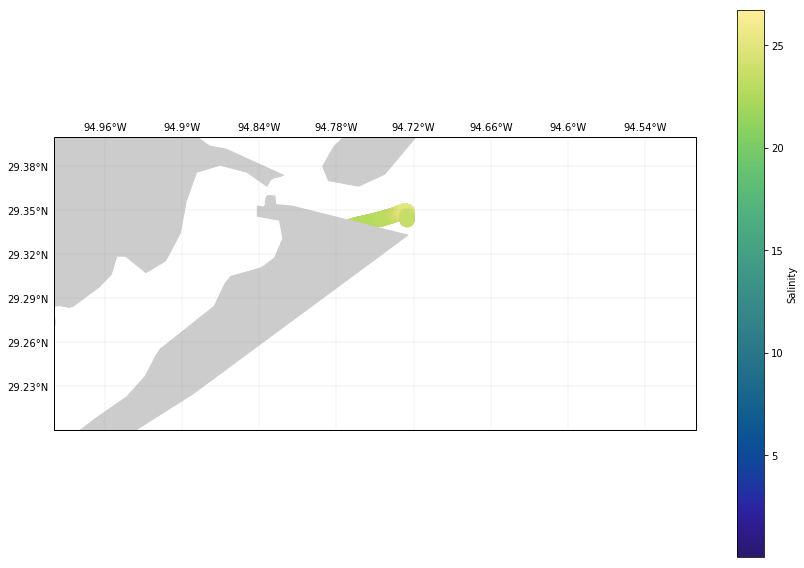

In [8]:
# Figure with Galveston Bay based on hours 4-7
fig = plt.figure(figsize=(12, 8)) # (9.4, 7.7))

ax = fig.add_axes([0.06, 0.01, 0.93, 0.95], projection=merc)
ax.set_frame_on(False) # kind of like it without the box
#extent controls bounds of cruise
ax.set_extent([-95.0, -94.5, 29.2, 29.4], pc)
gl = ax.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=True)
# the following two make the labels look like lat/lon format
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_bottom = False  # turn off labels where you don't want them
gl.ylabels_right = False
ax.add_feature(land_10m, facecolor='0.8')
ax.set_facecolor('0.8')

mappable = ax.scatter(df['ADU800-GGA-Lon']['2018-3-25 04:25':'2018-3-25 07:00'], df['ADU800-GGA-Lat']['2018-3-25 04:25':'2018-3-25 07:00'], c=df['Thermosalinograph-Data-Salinity']['2018-3-25 04:25':'2018-3-25 07:00'], s=200, cmap=cmo.haline, transform=pc,alpha=0.1)
cb = fig.colorbar(mappable)
cb.set_alpha(1)
cb.draw_all()
cb.set_label('Salinity')

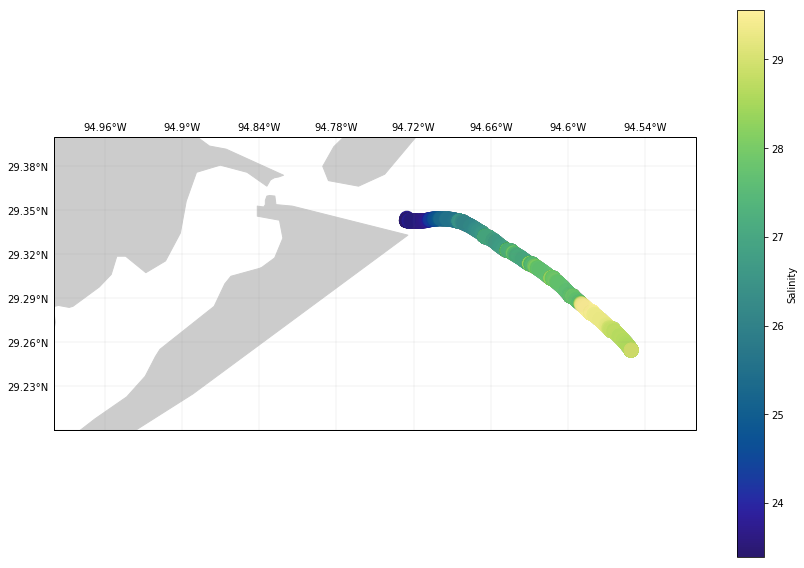

In [9]:
# Figure with Galveston Bay based on hours 7-9:30
fig = plt.figure(figsize=(12, 8)) # (9.4, 7.7))

ax = fig.add_axes([0.06, 0.01, 0.93, 0.95], projection=merc)
ax.set_frame_on(False) # kind of like it without the box
#extent controls bounds of cruise
ax.set_extent([-95.0, -94.5, 29.2, 29.4], pc)
gl = ax.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=True)
# the following two make the labels look like lat/lon format
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_bottom = False  # turn off labels where you don't want them
gl.ylabels_right = False
ax.add_feature(land_10m, facecolor='0.8')
ax.set_facecolor('0.8')

mappable = ax.scatter(df['ADU800-GGA-Lon']['2018-3-25 07:00':'2018-3-25 09:30'], df['ADU800-GGA-Lat']['2018-3-25 07:00':'2018-3-25 09:30'], c=df['Thermosalinograph-Data-Salinity']['2018-3-25 07:00':'2018-3-25 09:30'], s=200, cmap=cmo.haline, transform=pc,alpha=0.1)
cb = fig.colorbar(mappable)
cb.set_alpha(1)
cb.draw_all()
cb.set_label('Salinity')

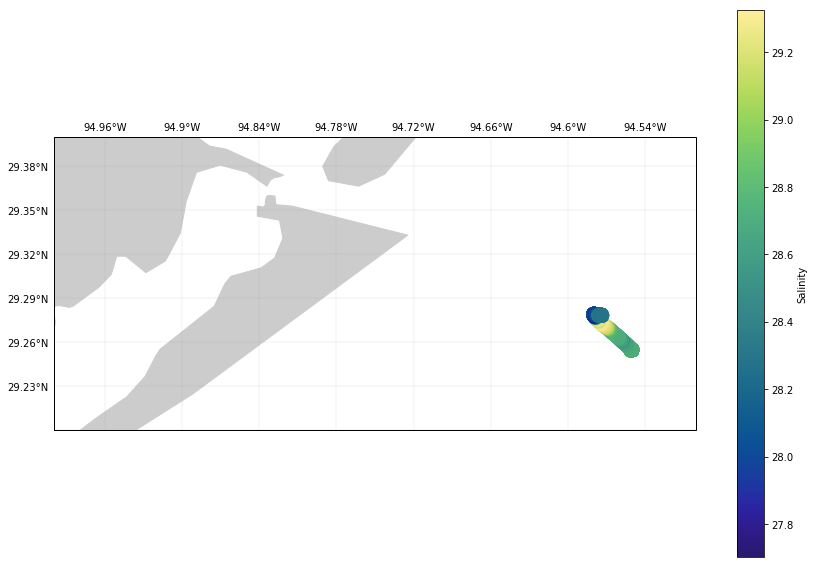

In [10]:
# Figure with Galveston Bay based on hours 9:30-10:30
fig = plt.figure(figsize=(12, 8)) # (9.4, 7.7))

ax = fig.add_axes([0.06, 0.01, 0.93, 0.95], projection=merc)
ax.set_frame_on(False) # kind of like it without the box
#extent controls bounds of cruise
ax.set_extent([-95.0, -94.5, 29.2, 29.4], pc)
gl = ax.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=True)
# the following two make the labels look like lat/lon format
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_bottom = False  # turn off labels where you don't want them
gl.ylabels_right = False
ax.add_feature(land_10m, facecolor='0.8')
ax.set_facecolor('0.8')

mappable = ax.scatter(df['ADU800-GGA-Lon']['2018-3-25 09:30':'2018-3-25 10:30'], df['ADU800-GGA-Lat']['2018-3-25 09:30':'2018-3-25 10:30'], c=df['Thermosalinograph-Data-Salinity']['2018-3-25 09:30':'2018-3-25 10:30'], s=200, cmap=cmo.haline, transform=pc, alpha=0.1)
cb = fig.colorbar(mappable)
cb.set_alpha(1)
cb.draw_all()
cb.set_label('Salinity')

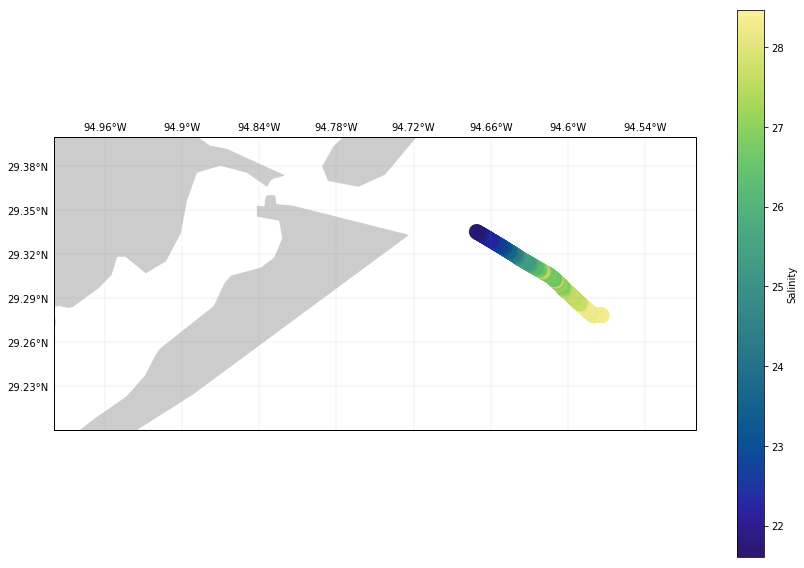

In [11]:
# Figure with Galveston Bay based on hours 10:30-11:30
fig = plt.figure(figsize=(12, 8)) # (9.4, 7.7))

ax = fig.add_axes([0.06, 0.01, 0.93, 0.95], projection=merc)
ax.set_frame_on(False) # kind of like it without the box
#extent controls bounds of cruise
ax.set_extent([-95.0, -94.5, 29.2, 29.4], pc)
gl = ax.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=True)
# the following two make the labels look like lat/lon format
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_bottom = False  # turn off labels where you don't want them
gl.ylabels_right = False
ax.add_feature(land_10m, facecolor='0.8')
ax.set_facecolor('0.8')

mappable = ax.scatter(df['ADU800-GGA-Lon']['2018-3-25 10:30':'2018-3-25 11:30'], df['ADU800-GGA-Lat']['2018-3-25 10:30':'2018-3-25 11:30'], c=df['Thermosalinograph-Data-Salinity']['2018-3-25 10:30':'2018-3-25 11:30'], s=200, cmap=cmo.haline, transform=pc, alpha=0.1)
cb = fig.colorbar(mappable)
cb.set_alpha(1)
cb.draw_all()
cb.set_label('Salinity')

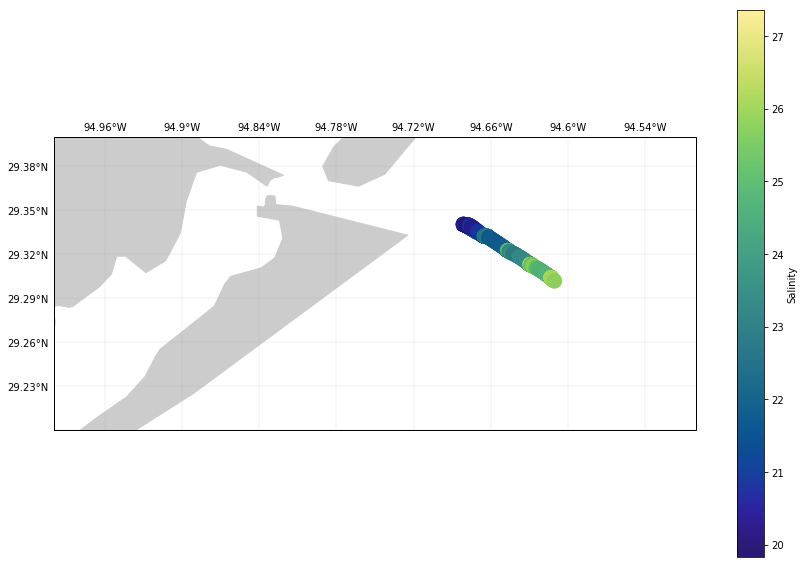

In [12]:
# Figure with Galveston Bay based on hours 11:30-12:30
fig = plt.figure(figsize=(12, 8)) # (9.4, 7.7))

ax = fig.add_axes([0.06, 0.01, 0.93, 0.95], projection=merc)
ax.set_frame_on(False) # kind of like it without the box
#extent controls bounds of cruise
ax.set_extent([-95.0, -94.5, 29.2, 29.4], pc)
gl = ax.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=True)
# the following two make the labels look like lat/lon format
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_bottom = False  # turn off labels where you don't want them
gl.ylabels_right = False
ax.add_feature(land_10m, facecolor='0.8')
ax.set_facecolor('0.8')

mappable = ax.scatter(df['ADU800-GGA-Lon']['2018-3-25 11:30':'2018-3-25 12:30'], df['ADU800-GGA-Lat']['2018-3-25 11:30':'2018-3-25 12:30'], c=df['Thermosalinograph-Data-Salinity']['2018-3-25 11:30':'2018-3-25 12:30'], s=200, cmap=cmo.haline, transform=pc, alpha=0.1)
cb = fig.colorbar(mappable)
cb.set_alpha(1)
cb.draw_all()
cb.set_label('Salinity')

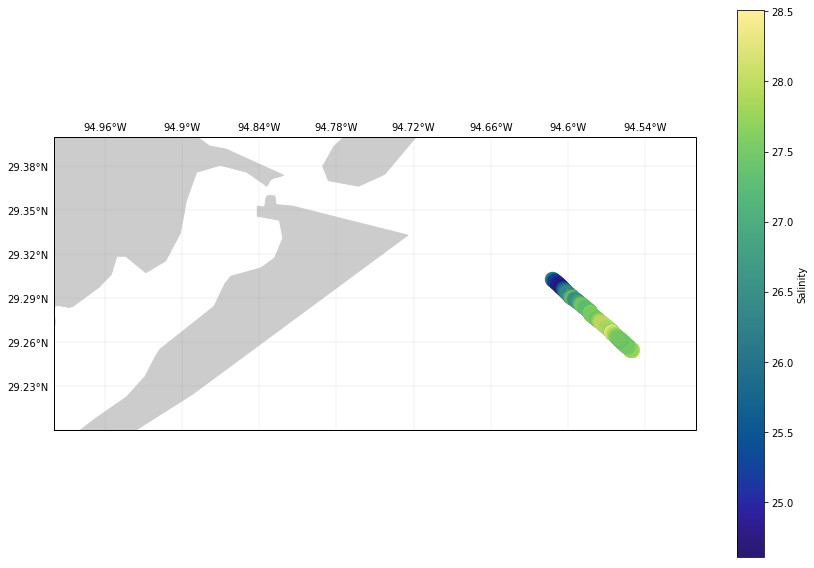

In [13]:
# Figure with Galveston Bay based on hours 12:30-13:30
fig = plt.figure(figsize=(12, 8)) # (9.4, 7.7))

ax = fig.add_axes([0.06, 0.01, 0.93, 0.95], projection=merc)
ax.set_frame_on(False) # kind of like it without the box
#extent controls bounds of cruise
ax.set_extent([-95.0, -94.5, 29.2, 29.4], pc)
gl = ax.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=True)
# the following two make the labels look like lat/lon format
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_bottom = False  # turn off labels where you don't want them
gl.ylabels_right = False
ax.add_feature(land_10m, facecolor='0.8')
ax.set_facecolor('0.8')

mappable = ax.scatter(df['ADU800-GGA-Lon']['2018-3-25 12:30':'2018-3-25 13:30'], df['ADU800-GGA-Lat']['2018-3-25 12:30':'2018-3-25 13:30'], c=df['Thermosalinograph-Data-Salinity']['2018-3-25 12:30':'2018-3-25 13:30'], s=200, cmap=cmo.haline, transform=pc, alpha=0.1)
cb = fig.colorbar(mappable)
cb.set_alpha(1)
cb.draw_all()
cb.set_label('Salinity')

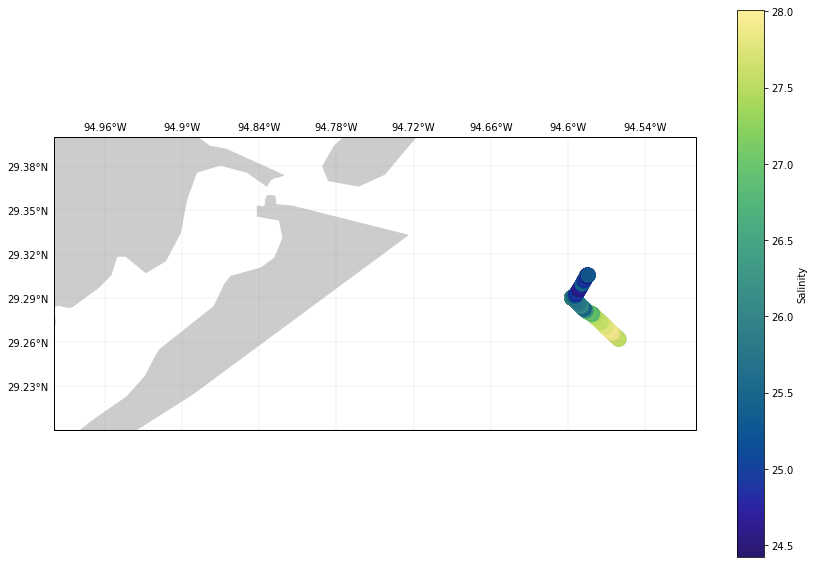

In [14]:
# Figure with Galveston Bay based on hours 13:30-14:30
fig = plt.figure(figsize=(12, 8)) # (9.4, 7.7))

ax = fig.add_axes([0.06, 0.01, 0.93, 0.95], projection=merc)
ax.set_frame_on(False) # kind of like it without the box
#extent controls bounds of cruise
ax.set_extent([-95.0, -94.5, 29.2, 29.4], pc)
gl = ax.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=True)
# the following two make the labels look like lat/lon format
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_bottom = False  # turn off labels where you don't want them
gl.ylabels_right = False
ax.add_feature(land_10m, facecolor='0.8')
ax.set_facecolor('0.8')

mappable = ax.scatter(df['ADU800-GGA-Lon']['2018-3-25 13:30':'2018-3-25 14:30'], df['ADU800-GGA-Lat']['2018-3-25 13:30':'2018-3-25 14:30'], c=df['Thermosalinograph-Data-Salinity']['2018-3-25 13:30':'2018-3-25 14:30'], s=200, cmap=cmo.haline, transform=pc, alpha=0.1)
cb = fig.colorbar(mappable)
cb.set_alpha(1)
cb.draw_all()
cb.set_label('Salinity')

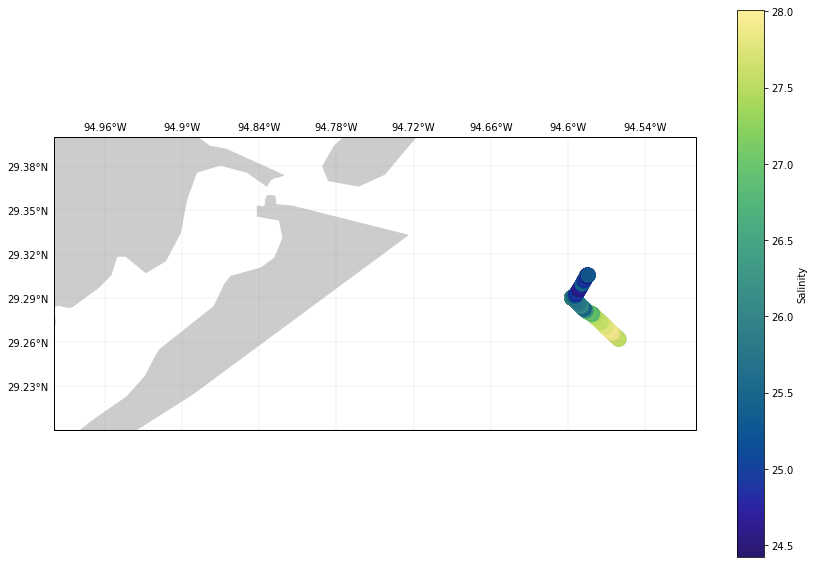

In [15]:
# Figure with Galveston Bay based on hours 13:30-14:30
fig = plt.figure(figsize=(12, 8)) # (9.4, 7.7))

ax = fig.add_axes([0.06, 0.01, 0.93, 0.95], projection=merc)
ax.set_frame_on(False) # kind of like it without the box
#extent controls bounds of cruise
ax.set_extent([-95.0, -94.5, 29.2, 29.4], pc)
gl = ax.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=True)
# the following two make the labels look like lat/lon format
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_bottom = False  # turn off labels where you don't want them
gl.ylabels_right = False
ax.add_feature(land_10m, facecolor='0.8')
ax.set_facecolor('0.8')

mappable = ax.scatter(df['ADU800-GGA-Lon']['2018-3-25 13:30':'2018-3-25 14:30'], df['ADU800-GGA-Lat']['2018-3-25 13:30':'2018-3-25 14:30'], c=df['Thermosalinograph-Data-Salinity']['2018-3-25 13:30':'2018-3-25 14:30'], s=200, cmap=cmo.haline, transform=pc, alpha=0.1)
cb = fig.colorbar(mappable)
cb.set_alpha(1)
cb.draw_all()
cb.set_label('Salinity')

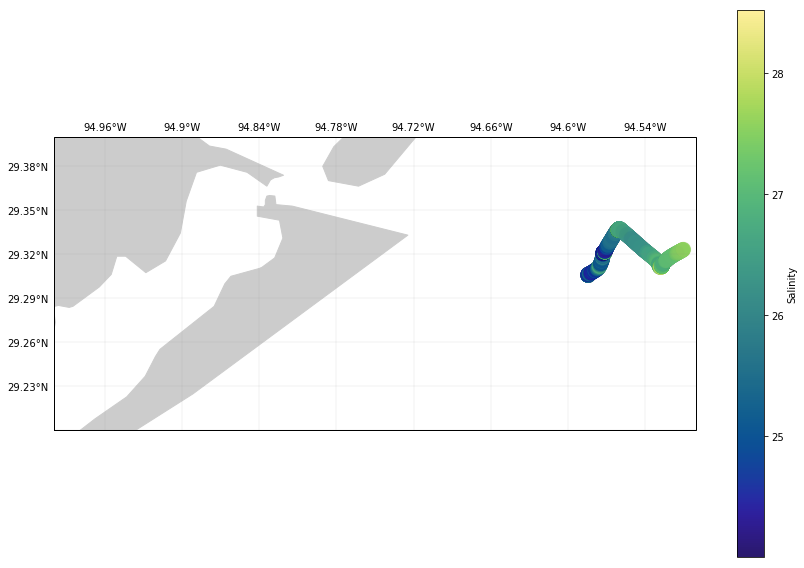

In [16]:
# Figure with Galveston Bay based on hours 14:30-15:30
fig = plt.figure(figsize=(12, 8)) # (9.4, 7.7))

ax = fig.add_axes([0.06, 0.01, 0.93, 0.95], projection=merc)
ax.set_frame_on(False) # kind of like it without the box
#extent controls bounds of cruise
ax.set_extent([-95.0, -94.5, 29.2, 29.4], pc)
gl = ax.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=True)
# the following two make the labels look like lat/lon format
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_bottom = False  # turn off labels where you don't want them
gl.ylabels_right = False
ax.add_feature(land_10m, facecolor='0.8')
ax.set_facecolor('0.8')

mappable = ax.scatter(df['ADU800-GGA-Lon']['2018-3-25 14:30':'2018-3-25 15:30'], df['ADU800-GGA-Lat']['2018-3-25 14:30':'2018-3-25 15:30'], c=df['Thermosalinograph-Data-Salinity']['2018-3-25 14:30':'2018-3-25 15:30'], s=200, cmap=cmo.haline, transform=pc, alpha=0.1)
cb = fig.colorbar(mappable)
cb.set_alpha(1)
cb.draw_all()
cb.set_label('Salinity')

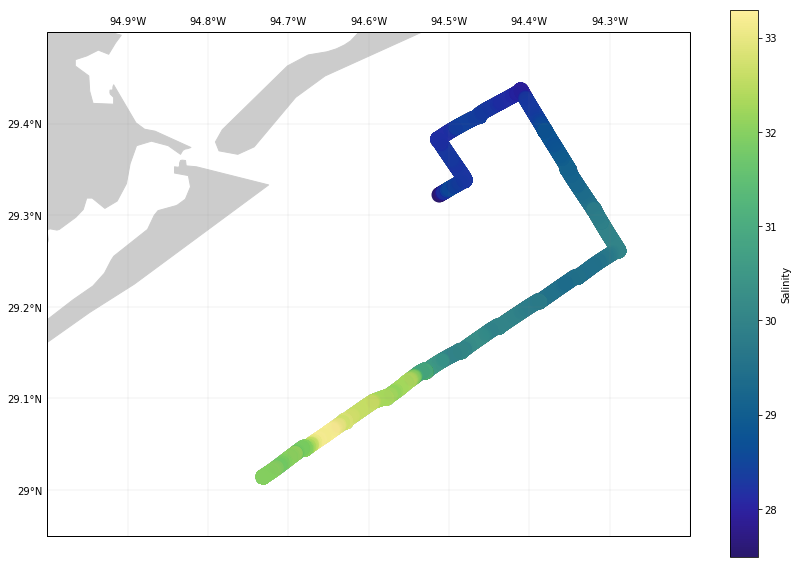

In [17]:
# Figure with Galveston Bay based on hours 15:30-23:30
fig = plt.figure(figsize=(12, 8)) # (9.4, 7.7))

ax = fig.add_axes([0.06, 0.01, 0.93, 0.95], projection=merc)
ax.set_frame_on(False) # kind of like it without the box
#extent controls bounds of cruise
ax.set_extent([-95.0, -94.2, 28.95, 29.5], pc)
gl = ax.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=True)
# the following two make the labels look like lat/lon format
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_bottom = False  # turn off labels where you don't want them
gl.ylabels_right = False
ax.add_feature(land_10m, facecolor='0.8')
ax.set_facecolor('0.8')

mappable = ax.scatter(df['ADU800-GGA-Lon']['2018-3-25 15:30':'2018-3-25 23:30'], df['ADU800-GGA-Lat']['2018-3-25 15:30':'2018-3-25 23:30'], c=df['Thermosalinograph-Data-Salinity']['2018-3-25 15:30':'2018-3-25 23:30'], s=200, cmap=cmo.haline, transform=pc, alpha=0.1)
cb = fig.colorbar(mappable)
cb.set_alpha(1)
cb.draw_all()
cb.set_label('Salinity')

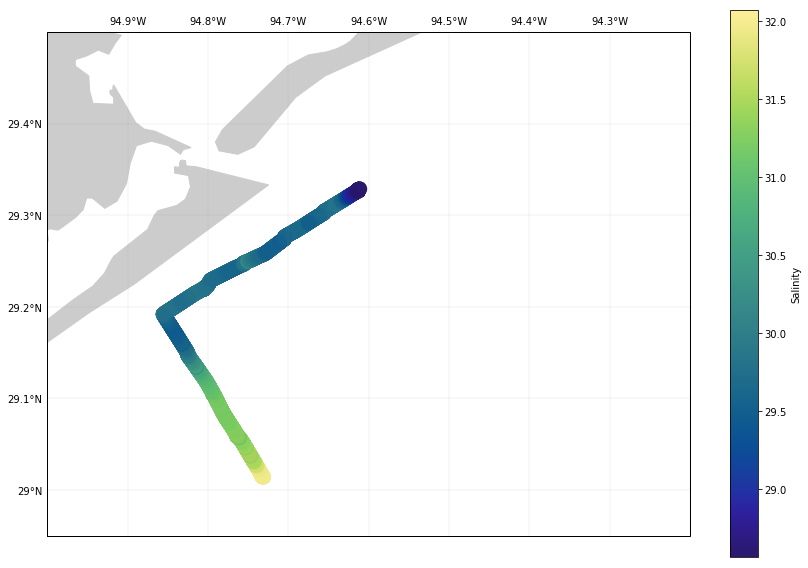

In [18]:
# Figure with Galveston Bay based on hours 23:30-3:30
fig = plt.figure(figsize=(12, 8)) # (9.4, 7.7))

ax = fig.add_axes([0.06, 0.01, 0.93, 0.95], projection=merc)
ax.set_frame_on(False) # kind of like it without the box
#extent controls bounds of cruise
ax.set_extent([-95.0, -94.2, 28.95, 29.5], pc)
gl = ax.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=True)
# the following two make the labels look like lat/lon format
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_bottom = False  # turn off labels where you don't want them
gl.ylabels_right = False
ax.add_feature(land_10m, facecolor='0.8')
ax.set_facecolor('0.8')

mappable = ax.scatter(df['ADU800-GGA-Lon']['2018-3-25 23:30':'2018-3-26 3:30'], df['ADU800-GGA-Lat']['2018-3-25 23:30':'2018-3-26 3:30'], c=df['Thermosalinograph-Data-Salinity']['2018-3-25 23:30':'2018-3-26 3:30'], s=200, cmap=cmo.haline, transform=pc, alpha=0.1)
cb = fig.colorbar(mappable)
cb.set_alpha(1)
cb.draw_all()
cb.set_label('Salinity')

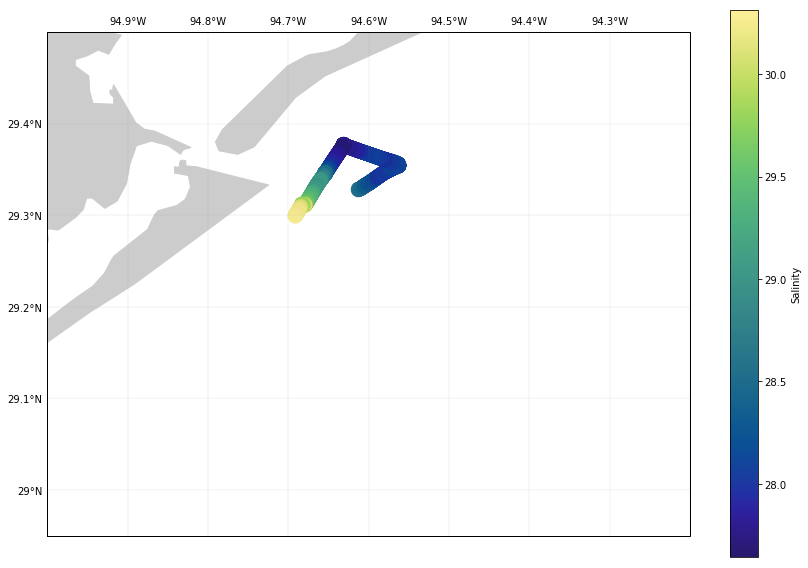

In [21]:
# Figure with Galveston Bay based on hours 3:30-5:30
fig = plt.figure(figsize=(12, 8)) # (9.4, 7.7))

ax = fig.add_axes([0.06, 0.01, 0.93, 0.95], projection=merc)
ax.set_frame_on(False) # kind of like it without the box
#extent controls bounds of cruise
ax.set_extent([-95.0, -94.2, 28.95, 29.5], pc)
gl = ax.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=True)
# the following two make the labels look like lat/lon format
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_bottom = False  # turn off labels where you don't want them
gl.ylabels_right = False
ax.add_feature(land_10m, facecolor='0.8')
ax.set_facecolor('0.8')

mappable = ax.scatter(df['ADU800-GGA-Lon']['2018-3-26 3:30':'2018-3-26 5:30'], df['ADU800-GGA-Lat']['2018-3-26 3:30':'2018-3-26 5:30'], c=df['Thermosalinograph-Data-Salinity']['2018-3-26 3:30':'2018-3-26 5:30'], s=200, cmap=cmo.haline, transform=pc, alpha=0.1)
cb = fig.colorbar(mappable)
cb.set_alpha(1)
cb.draw_all()
cb.set_label('Salinity')

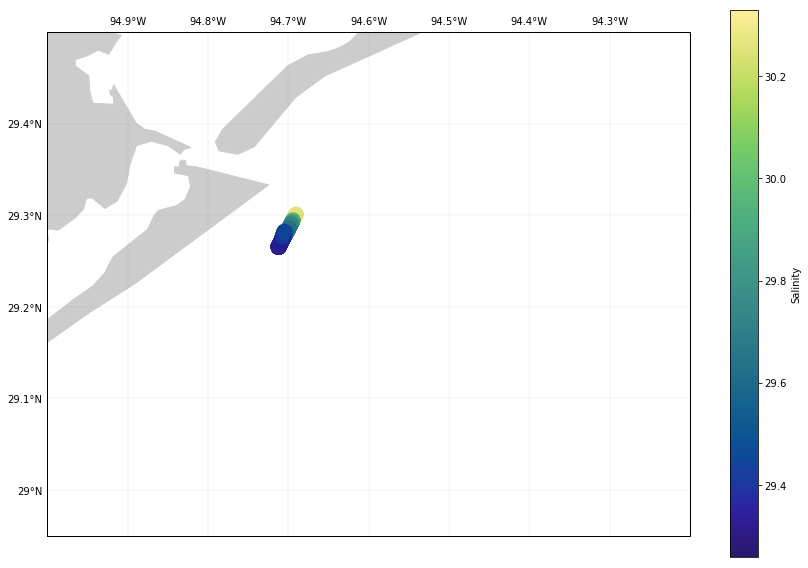

In [24]:
# Figure with Galveston Bay based on hours 5:30-6:00
fig = plt.figure(figsize=(12, 8)) # (9.4, 7.7))

ax = fig.add_axes([0.06, 0.01, 0.93, 0.95], projection=merc)
ax.set_frame_on(False) # kind of like it without the box
#extent controls bounds of cruise
ax.set_extent([-95.0, -94.2, 28.95, 29.5], pc)
gl = ax.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=True)
# the following two make the labels look like lat/lon format
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_bottom = False  # turn off labels where you don't want them
gl.ylabels_right = False
ax.add_feature(land_10m, facecolor='0.8')
ax.set_facecolor('0.8')

mappable = ax.scatter(df['ADU800-GGA-Lon']['2018-3-26 5:30':'2018-3-26 6:00'], df['ADU800-GGA-Lat']['2018-3-26 5:30':'2018-3-26 6:00'], c=df['Thermosalinograph-Data-Salinity']['2018-3-26 5:30':'2018-3-26 6:00'], s=200, cmap=cmo.haline, transform=pc, alpha=0.1)
cb = fig.colorbar(mappable)
cb.set_alpha(1)
cb.draw_all()
cb.set_label('Salinity')

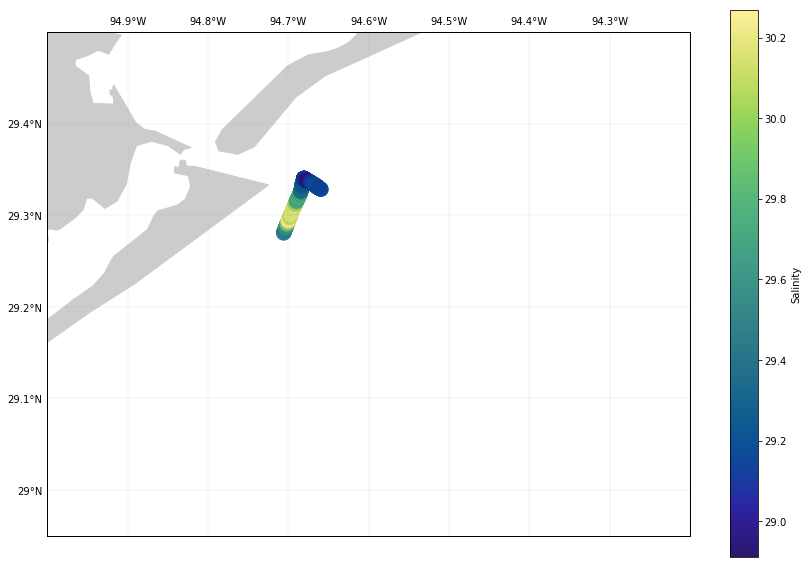

In [25]:
# Figure with Galveston Bay based on hours 6:00-7:00
fig = plt.figure(figsize=(12, 8)) # (9.4, 7.7))

ax = fig.add_axes([0.06, 0.01, 0.93, 0.95], projection=merc)
ax.set_frame_on(False) # kind of like it without the box
#extent controls bounds of cruise
ax.set_extent([-95.0, -94.2, 28.95, 29.5], pc)
gl = ax.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=True)
# the following two make the labels look like lat/lon format
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_bottom = False  # turn off labels where you don't want them
gl.ylabels_right = False
ax.add_feature(land_10m, facecolor='0.8')
ax.set_facecolor('0.8')

mappable = ax.scatter(df['ADU800-GGA-Lon']['2018-3-26 6:00':'2018-3-26 7:00'], df['ADU800-GGA-Lat']['2018-3-26 6:00':'2018-3-26 7:00'], c=df['Thermosalinograph-Data-Salinity']['2018-3-26 6:00':'2018-3-26 7:00'], s=200, cmap=cmo.haline, transform=pc, alpha=0.1)
cb = fig.colorbar(mappable)
cb.set_alpha(1)
cb.draw_all()
cb.set_label('Salinity')

In [26]:
# Figure with Galveston Bay based on hours 7:00-8:00
fig = plt.figure(figsize=(12, 8)) # (9.4, 7.7))

ax = fig.add_axes([0.06, 0.01, 0.93, 0.95], projection=merc)
ax.set_frame_on(False) # kind of like it without the box
#extent controls bounds of cruise
ax.set_extent([-95.0, -94.2, 28.95, 29.5], pc)
gl = ax.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=True)
# the following two make the labels look like lat/lon format
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_bottom = False  # turn off labels where you don't want them
gl.ylabels_right = False
ax.add_feature(land_10m, facecolor='0.8')
ax.set_facecolor('0.8')

mappable = ax.scatter(df['ADU800-GGA-Lon']['2018-3-26 7:00':'2018-3-26 8:00'], df['ADU800-GGA-Lat']['2018-3-26 7:00':'2018-3-26 8:00'], c=df['Thermosalinograph-Data-Salinity']['2018-3-26 7:00':'2018-3-26 8:00'], s=200, cmap=cmo.haline, transform=pc, alpha=0.1)
cb = fig.colorbar(mappable)
cb.set_alpha(1)
cb.draw_all()
cb.set_label('Salinity')

IndexError: Out of bounds on buffer access (axis 0)

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x111825ea0> (for post_execute):


IndexError: Out of bounds on buffer access (axis 0)

IndexError: Out of bounds on buffer access (axis 0)